In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ReactionTypes = pd.read_csv("4.1.a ReactionTypes.csv")

In [3]:
Reactions = pd.read_csv("4.1.b Reactions.csv")

In [4]:
Content = pd.read_csv("4.1.c Content.csv")

In [5]:
Content = Content.rename(columns={'Type': 'Content Type'})

In [6]:
Content.head()

,Unnamed: 0,Content ID,User ID,Content Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [7]:
Content.drop(["URL", "User ID"], axis=1, inplace=True)

In [8]:
Content['Category'] = Content['Category'].str.replace('"', '')

In [9]:
Content.head()

,Unnamed: 0,Content ID,Content Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [10]:
Reactions.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [11]:
#Removing all rows having any null values
Reactions.dropna(inplace=True)

In [12]:
Reactions.isnull().sum()

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Datetime      0
dtype: int64

In [13]:
Reactions.drop(["User ID"], axis=1, inplace=True)

In [14]:
Reactions.head()

,Unnamed: 0,Content ID,Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [15]:
ReactionTypes = ReactionTypes.rename(columns={'Type': 'Reaction Type'})

In [16]:
ReactionTypes.head()

,Unnamed: 0,Reaction Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [17]:
Reactions = Reactions.rename(columns={'Type': 'Reaction Type'})

In [18]:
Reactions.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [19]:
# join Content and Reactions on 'Content ID' column
merged_df1 = pd.merge(Content, Reactions, on='Content ID')

In [20]:
merged_df1.head()

,Unnamed: 0_x,Content ID,Content Type,Category,Unnamed: 0_y,Reaction Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,1,disgust,2020-11-07 09:43:50
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,2,dislike,2021-06-17 12:22:51
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,3,scared,2021-04-18 05:13:58
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,4,disgust,2021-01-06 19:13:01
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,5,interested,2020-08-23 12:25:58


In [21]:
# join merged_df with Reaction Types on 'Type' column
final_df = pd.merge(merged_df1, ReactionTypes, on='Reaction Type')

In [22]:
final_df.head()

,Unnamed: 0_x,Content ID,Content Type,Category,Unnamed: 0_y,Reaction Type,Datetime,Unnamed: 0,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,1,disgust,2020-11-07 09:43:50,2,negative,0
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,4,disgust,2021-01-06 19:13:01,2,negative,0
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,35,disgust,2021-04-09 02:46:20,2,negative,0
3,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,52,disgust,2021-03-28 21:15:26,2,negative,0
4,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,88,disgust,2020-08-04 05:40:33,2,negative,0


In [23]:
final_df.drop(["Unnamed: 0_y"], axis=1, inplace=True)

In [24]:
final_df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [25]:
final_df.drop(["Unnamed: 0_x"], axis=1, inplace=True)

In [26]:
final_df.head()

,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0


In [27]:
df = final_df

In [28]:
df

,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0
...,...,...,...,...,...,...,...
22529,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,2020-10-04 22:26:33,positive,72
22530,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,2020-09-18 10:50:50,positive,72
22531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,adore,2020-10-31 03:58:44,positive,72
22532,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,adore,2020-06-25 15:12:29,positive,72


In [29]:
#df.to_csv()

In [30]:
top_categories = df.groupby('Category')['Score'].sum().sort_values(ascending=False).head(5)

In [31]:
top_categories

Category
animals           65063
healthy eating    62866
technology        62818
science           61081
culture           59213
Name: Score, dtype: int64

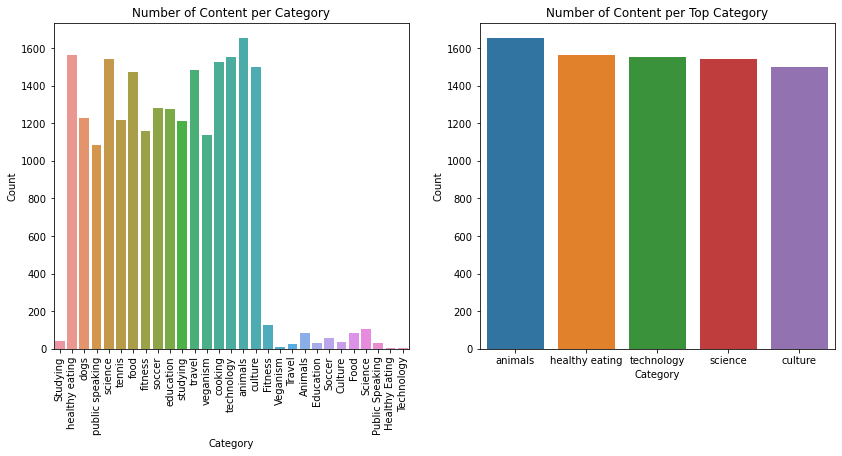

In [46]:
# Get the top 5 categories by score
top_categories = df.groupby('Category')['Score'].sum().sort_values(ascending=False).head(5)

# Get the count of content per category
category_counts = df['Category'].value_counts()

# Get the count of content in the top 5 categories
top_category_counts = category_counts[category_counts.index.isin(top_categories.index)]

# Set up the subplots
fig, axs = plt.subplots(ncols=2, figsize=(14,6))

# Plot the first graph on the first subplot
sns.countplot(x='Category', data=final_df, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_title('Number of Content per Category')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Count')

# Plot the second graph on the second subplot
sns.barplot(x=top_category_counts.index, y=top_category_counts.values, ax=axs[1])
axs[1].set_title('Number of Content per Top Category')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Count')

# Show the plot
plt.show()

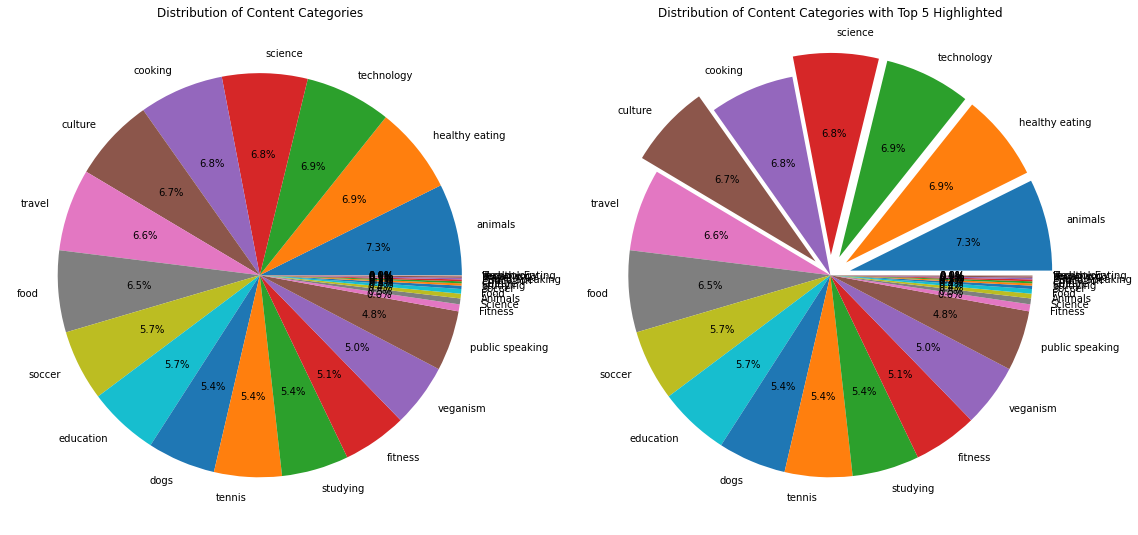

In [33]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,8))

# Create a pie chart of the category distribution in the first subplot
ax1.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
ax1.set_title('Distribution of Content Categories')

# Get the count of content per category
category_counts = df['Category'].value_counts()

# Get the sum of scores per category and sort by descending order
category_scores = df.groupby('Category')['Score'].sum().sort_values(ascending=False)

# Create a list of explode values to highlight the top 5 categories
explode = [0.1 if category in category_scores.head(5).index else 0 for category in category_counts.index]

# Create a pie chart of the category distribution in the second subplot
ax2.pie(category_counts.values, labels=category_counts.index, explode=explode, autopct='%1.1f%%')
ax2.set_title('Distribution of Content Categories with Top 5 Highlighted')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plots
plt.show()


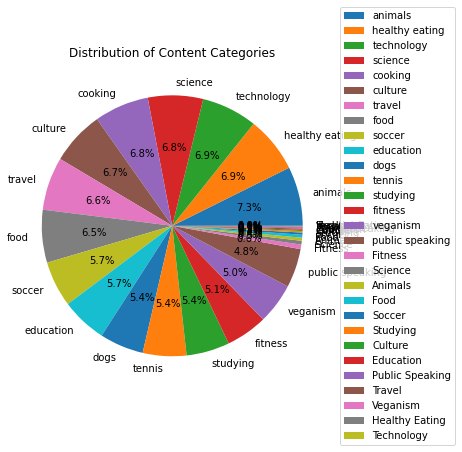

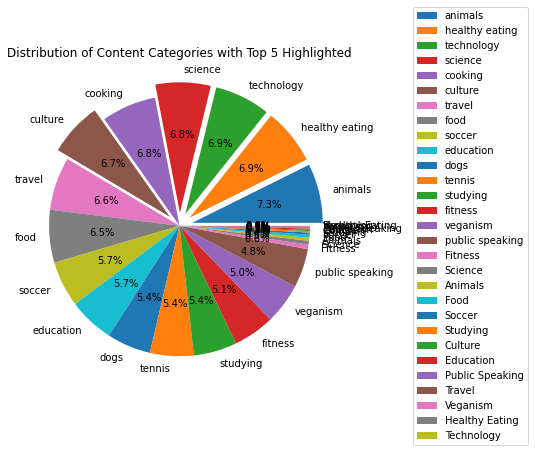

In [56]:
# Create the first pie chart of the category distribution
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
ax1.set_title('Distribution of Content Categories')

# Adjust the layout to prevent overlapping labels
ax1.set_aspect('equal')  # Ensure the pie is drawn as a circle
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move the legend outside the plot

# Show the first pie chart
plt.show()

# Create the second pie chart of the category distribution with top 5 highlighted
fig, ax2 = plt.subplots(figsize=(8, 6))

# Create a list of explode values to highlight the top 5 categories
explode = [0.1 if category in category_scores.head(5).index else 0 for category in category_counts.index]

ax2.pie(category_counts.values, labels=category_counts.index, explode=explode, autopct='%1.1f%%')
ax2.set_title('Distribution of Content Categories with Top 5 Highlighted')

# Adjust the layout to prevent overlapping labels
ax2.set_aspect('equal')  # Ensure the pie is drawn as a circle
ax2.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))  # Move the legend outside the plot

# Show the second pie chart
plt.show()


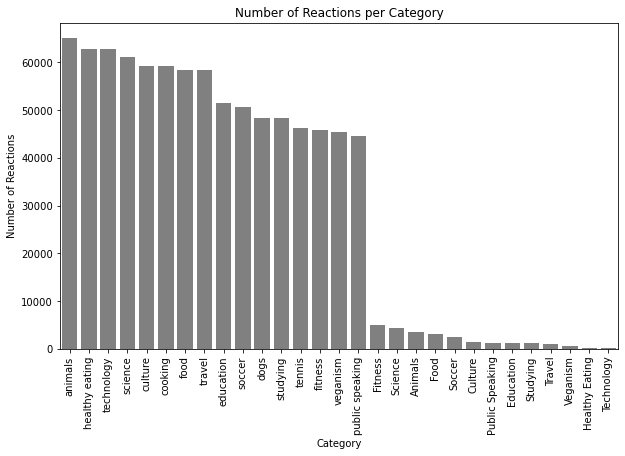

In [34]:
# Get the sum of scores per category and sort by descending order
category_scores = df.groupby('Category')['Score'].sum().sort_values(ascending=False)

# Get the count of content per category
category_counts = df['Category'].value_counts()

# Create a list of top 5 categories by score
top_categories = category_scores.head(5)

# Create a barplot of the number of reactions per category, with top 5 categories highlighted
plt.figure(figsize=(10, 6))
sns.barplot(x=category_scores.index, y=category_scores.values, color='gray')
#sns.barplot(x=top_categories.index, y=top_categories.values, color='orange')
plt.title('Number of Reactions per Category')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Reactions')
plt.show()


In [35]:
df

,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0
...,...,...,...,...,...,...,...
22529,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,2020-10-04 22:26:33,positive,72
22530,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,2020-09-18 10:50:50,positive,72
22531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,adore,2020-10-31 03:58:44,positive,72
22532,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,adore,2020-06-25 15:12:29,positive,72


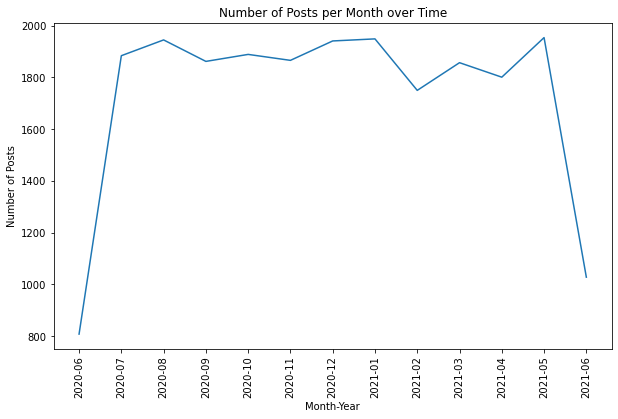

In [36]:
# Convert Datetime column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create a new column with the month and year information
df['Month_Year'] = df['Datetime'].dt.to_period('M')

# Group by month and year and count the number of posts
posts_per_month = df.groupby('Month_Year')['Content ID'].count()

# Create a line chart of the number of posts per month over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=posts_per_month.index.astype(str), y=posts_per_month.values)
plt.title('Number of Posts per Month over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.show()


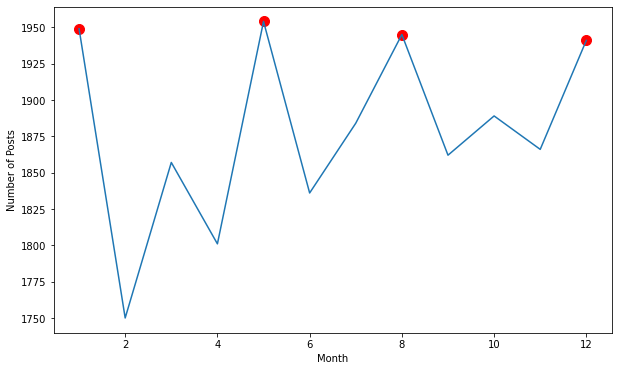

In [37]:
# Convert Datetime column to datetime object
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create Month column
df['Month'] = df['Datetime'].dt.month

# Count the number of posts per month
month_counts = df['Month'].value_counts().sort_index()

# Sort the values by descending order and select the top 4 months
top_4_months = month_counts.sort_values(ascending=False).head(4).index

# Create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=month_counts)
plt.xlabel('Month')
plt.ylabel('Number of Posts')

# Highlight the top 4 months
for month in top_4_months:
    plt.scatter(x=month, y=month_counts[month], s=100, c='red', marker='o')
    
plt.show()


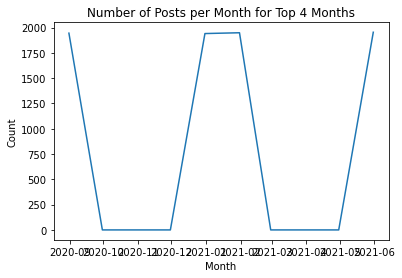

In [38]:
# Convert the Datetime column to a datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Group the data by month and count the number of posts in each month
monthly_counts = df.groupby(pd.Grouper(key='Datetime', freq='M'))['Content ID'].count()

# Sort the values in descending order and select the top 4 months
top_months = monthly_counts.sort_values(ascending=False).head(4).index

# Filter the data for the top 4 months
top_months_data = df[df['Datetime'].dt.month.isin(top_months.month)]

# Group the filtered data by month and count the number of posts in each month
top_monthly_counts = top_months_data.groupby(pd.Grouper(key='Datetime', freq='M'))['Content ID'].count()

# Plot a line chart of the number of posts per month for the top 4 months
sns.lineplot(x=top_monthly_counts.index, y=top_monthly_counts.values)
plt.title('Number of Posts per Month for Top 4 Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [39]:
# Group the data by category
grouped = df.groupby("Category")

# Count the number of reactions for each category
reaction_counts = grouped["Reaction Type"].count()

reaction_counts

Category
Animals              85
Culture              37
Education            33
Fitness             126
Food                 83
Healthy Eating        6
Public Speaking      29
Science             106
Soccer               60
Studying             41
Technology            3
Travel               27
Veganism             10
animals            1653
cooking            1525
culture            1501
dogs               1227
education          1278
fitness            1158
food               1473
healthy eating     1566
public speaking    1087
science            1540
soccer             1279
studying           1210
technology         1554
tennis             1218
travel             1483
veganism           1136
Name: Reaction Type, dtype: int64

In [40]:
reaction_counts[['Animals','healthy eating','technology','Science','Culture']]

Category
Animals             85
healthy eating    1566
technology        1554
Science            106
Culture             37
Name: Reaction Type, dtype: int64

In [209]:
#reaction_counts[['Animals','healthy eating','technology','Science','Culture']].sum()

3348

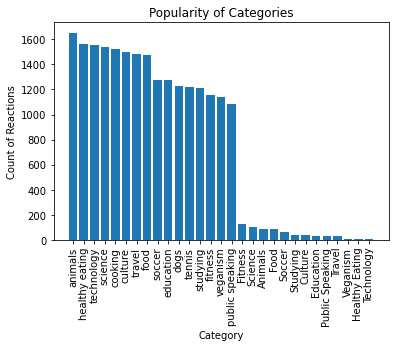

In [41]:
# Sort the reaction_counts series in descending order
sorted_counts = reaction_counts.sort_values(ascending=False)

# Plot the bar chart
plt.bar(sorted_counts.index, sorted_counts.values)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Count of Reactions')
plt.title('Popularity of Categories')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the chart
plt.show()


In [210]:
# Get the unique categories
unique_categories = df['Category'].unique()

print("There are total " + str(df['Category'].nunique()) + " Unique categories.\n")

# Print the unique categories
for category in unique_categories:
    print(category)

There are total 29 Unique categories.

Studying
healthy eating
dogs
public speaking
science
tennis
food
fitness
soccer
education
studying
travel
veganism
cooking
technology
animals
culture
Fitness
Veganism
Travel
Animals
Education
Soccer
Culture
Food
Science
Public Speaking
Healthy Eating
Technology


The month with the most posts in 2020 is 2020-08
The month with the most posts in 2021 is 2021-05


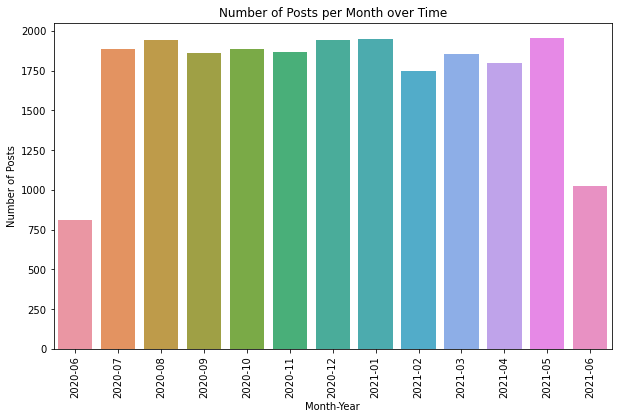

In [216]:
# Convert Datetime column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create a new column with the month and year information
df['Month_Year'] = df['Datetime'].dt.to_period('M')

# Group by month and year and count the number of posts
posts_per_month = df.groupby('Month_Year')['Content ID'].count()

# Find the month with the most posts in each year
most_posts_per_year = posts_per_month.groupby(posts_per_month.index.year).idxmax()

# Print the month with the most posts in each year
for year, month in most_posts_per_year.items():
    print(f"The month with the most posts in {year} is {month}")
    
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=posts_per_month.index.astype(str), y=posts_per_month.values)
plt.title('Number of Posts per Month over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.show()

In [217]:
# Get the max post count for each year
max_post_count_per_year = posts_per_month.groupby(posts_per_month.index.year).max()

# Print the max post count for each year
for year, count in max_post_count_per_year.items():
    print(f"The max post count in {year} is {count}")

The max post count in 2020 is 1945
The max post count in 2021 is 1954
